<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Script-setup" data-toc-modified-id="Script-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Script setup</a></span></li><li><span><a href="#Data-directory-preparention" data-toc-modified-id="Data-directory-preparention-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data directory preparention</a></span></li><li><span><a href="#Data-file-preparation" data-toc-modified-id="Data-file-preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data file preparation</a></span><ul class="toc-item"><li><span><a href="#input-directory-(all-general-raw-data-files)" data-toc-modified-id="input-directory-(all-general-raw-data-files)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><code>input</code> directory (all general raw data files)</a></span></li><li><span><a href="#input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)" data-toc-modified-id="input/Bottom_up_method-directory-(all-necessary-raw-data-files-for-the-bottom-up-method)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><code>input/Bottom_up_method</code> directory (all necessary raw data files for the bottom up method)</a></span></li></ul></li><li><span><a href="#Load-data-functions" data-toc-modified-id="Load-data-functions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Load data functions</a></span></li><li><span><a href="#Load-data-sets" data-toc-modified-id="Load-data-sets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data sets</a></span></li><li><span><a href="#Emission-factor-calculation-method" data-toc-modified-id="Emission-factor-calculation-method-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Emission factor calculation method</a></span><ul class="toc-item"><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Emission-factor-per-power-plants" data-toc-modified-id="Emission-factor-per-power-plants-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Emission factor per power plants</a></span><ul class="toc-item"><li><span><a href="#Validation-of-emission-factor-per-power-plant" data-toc-modified-id="Validation-of-emission-factor-per-power-plant-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Validation of emission factor per power plant</a></span></li></ul></li><li><span><a href="#Emission-factor-per-technology-and-country" data-toc-modified-id="Emission-factor-per-technology-and-country-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Emission factor per technology and country</a></span></li><li><span><a href="#Emission-factor-per-country" data-toc-modified-id="Emission-factor-per-country-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Emission factor per country</a></span></li></ul></li><li><span><a href="#Validation-of-calculated-emission-factors" data-toc-modified-id="Validation-of-calculated-emission-factors-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Validation of calculated emission factors</a></span><ul class="toc-item"><li><span><a href="#Validation-threshold-for-EF-per-technology-and-country" data-toc-modified-id="Validation-threshold-for-EF-per-technology-and-country-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Validation threshold for EF per technology and country</a></span></li></ul></li><li><span><a href="#Export-final-EF-to-csv" data-toc-modified-id="Export-final-EF-to-csv-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Export final EF to csv</a></span></li></ul></div>

# Introduction

In this script, we determine country specific emission factors (EF) for different generation technologies. The calculated EF per technology is based on an bottom up method, that uses the hourly power plant generation and yearly published emission data on power plant level.

The used method follows the idea to calculated a EF for individual power plants. In a late step the country specific EF per technology is determined by taking the mean EF from a representative sample of power plant-specific EFs in the resektive country.

# Script setup

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter 

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [15, 10]

#helpers
from helpers import change_ENTSOE_ProductionTypeName
from helpers import load_timeseries_ENTSOE

# Data directory preparention

Create input, processed and output folders if they don't exist
If the paths are relative, the corresponding folders will be created inside the current working directory.
- input -> all needed input data
- processed -> save point and exchange with other scripts
- output -> final emission factors

In [2]:
input_directory_path = os.path.join('input')
Bootom_up_methode_input_directory_path = os.path.join('input', 'Bootom_up_methode')
processed_directory_path = 'processed'
output_directory_path = os.path.join('output')

os.makedirs(input_directory_path, exist_ok=True)
os.makedirs(Bootom_up_methode_input_directory_path, exist_ok=True)
os.makedirs(processed_directory_path, exist_ok=True)
os.makedirs(output_directory_path, exist_ok=True)

# Data file preparation

## `input` directory (all general raw data files)

- 1) ENTSO-E production per type
Production per type from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Production Type Available online: 
https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show
Processed with the following script that converts the data to hourly resolution (private script from INATECH):

 File - > time_series_60min_multiindex.csv -> generation per technology
 
- 2) ENTSO-E production per unit
Production per Unit from ENTSO-E
Original data: ENTSO-E Transparency Platform, Actual Generation per Generation Unit Available online: https://transparency.entsoe.eu/generation/r2/actualGenerationPerGenerationUnit/show (accessed on Apr 29, 2020).
Processed with the following script that converts the data to hourly resolution (private script from INATECH):
https://github.com/INATECH-CIG/entso-e_GenerationOutputPerUnit

File - > gen_data.csv -> hourly generation data per unit

File - > unit_data.csv -> information about the generation units



In [3]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(input_directory_path, fn) for fn in os.listdir(input_directory_path)]

print(filenames)

['input\\Bootom_up_methode', 'input\\CO2_Signal', 'input\\EEA_Method', 'input\\gen_data.csv', 'input\\Matching', 'input\\time_series_60min_multiindex.csv', 'input\\unit_data.csv']


## `input/Bottom_up_method` directory (all necessary raw data files for the bottom up method)

Based on the developed method the following data sets needed:

- 1) Matcher for power plants in ENTSO-E and EUTL Data for Europe
The matching was performed by a manual process (see description).

File - > Matching_Entso_EUTL_EU.csv

- 2) EU Emissions Data (EUTL)
Data are provided in the report section of the following web side:
https://ec.europa.eu/clima/policies/ets/registry_en#tab-0-1

For example: ->Documentation->Reports->Verified Emissions for 2019

File - > "Verified Emissions for 2019" -> verified_emissions_2018_en.xlsx -> converted to .csv

Another way to check the data is directly through the European Union Transaction Log:
https://ec.europa.eu/clima/ets/napMgt.do?languageCode=en

In [4]:
# Checks if the the input directories are empty or not
# Checks all filenames in the input directory

if not os.listdir(Bootom_up_methode_input_directory_path) :
    print("The directory for the bootom up method is empty. Please provide the data to the directory as described in the instructions above.")


filenames = [os.path.join(Bootom_up_methode_input_directory_path, fn) for fn in os.listdir(Bootom_up_methode_input_directory_path)]

print(filenames)

['input\\Bootom_up_methode\\entsoe_unit_gen_data.csv', 'input\\Bootom_up_methode\\matching_ENTSOE_EU_ETS.csv', 'input\\Bootom_up_methode\\Matching_Entso_EUTL_EU_2.csv', 'input\\Bootom_up_methode\\Matching_Entso_EUTL_LCPD.csv', 'input\\Bootom_up_methode\\nrg_cb_pem.csv', 'input\\Bootom_up_methode\\time_series_60min_multiindex.csv', 'input\\Bootom_up_methode\\verified_emissions_2018_en.csv', 'input\\Bootom_up_methode\\verified_emissions_2018_en.xlsx']


# Load data functions

In [5]:
def load_matching_data_EU(path, fn):
    """
    Load the matching list for EU power plants with ENTSO-E identifier and the EUTL identifier.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn), sep = ',', header = 0, index_col=0)

    return df

def load_EUTL_data(path, fn):
    """
    Load the EU emission data (EUTL).
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ';', header = 13, encoding='ISO-8859-1')

    return df

def load_generation_per_unit(path, fn):
    """
    Load the ENTSO-E gernation per unit data.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    generation = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0,parse_dates=True)
    
    return generation

def load_unit_info(path, fn):
    """
    Load the ENTSO-E generation unit information.
        
    Parameters
    ----------
    path: str
        path to data
    fn : str
        filename
        
    """
    
    df = pd.read_csv(os.path.join(path, fn),sep = ',',index_col=0)
    
    # Rename production type name according to own convention
    df.ProductionTypeName = change_ENTSOE_ProductionTypeName(df.ProductionTypeName)
    
    # set name for the index
    df.index.set_names('GenerationUnitEIC', inplace=True)

    return df

# Load data sets

#### Load power plant generation data

In [6]:
generation_per_unit = load_generation_per_unit(input_directory_path, 'gen_data.csv')

#### Load power plant unit inforamtion (capacity, name, etc.)

In [7]:
generation_unit_info = load_unit_info(input_directory_path, 'unit_data.csv')

#### Load CO2_emissions data from EUTL dataset

In [8]:
EUTL_emissions = load_EUTL_data(Bootom_up_methode_input_directory_path, 'verified_emissions_2018_en.csv')

#### Load machting information for power plant data

In [9]:
unit_matching_EU = load_matching_data_EU(Bootom_up_methode_input_directory_path, 'matching_ENTSOE_EU_ETS.csv')

# Emission factor calculation method

In the following the EF calculation is down step by step

## Data preperation

#### Yearly power generation per unit

Store the yearly generation per power plant to the power plant information data set.

In [10]:
generation_unit_info['generation_2018'] = generation_per_unit.sum()

#### Matching ENTSO-E ID and EUTL ID

Combining matching information (ENTSO-E ID and EUTL ID) to the generation unit info. Keep only matched information.

In [11]:
generation_unit_info_matched = pd.merge(generation_unit_info, unit_matching_EU, left_on='GenerationUnitEIC', right_on='eic_g', how='inner')

#### Connecting emissions and production data

Create a unique identifier from the country code and the plant ID in the emission data set and generation unit data set.

In [12]:
generation_unit_info_matched['Unique_ID'] = generation_unit_info_matched.EUTL_countrycode + generation_unit_info_matched.EUTL_ID.astype(str)
EUTL_emissions['Unique_ID'] = EUTL_emissions.REGISTRY_CODE + EUTL_emissions.INSTALLATION_IDENTIFIER.astype(int).astype(str)

#### Merge both datasets 

In [13]:
generation_unit_info_matched = generation_unit_info_matched.merge(EUTL_emissions, left_on='Unique_ID', right_on='Unique_ID', how='inner')

Show first 10 entries from data

In [14]:
generation_unit_info_matched.head(5)

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,duplicate_count,generation_2018,eic_g,...,VERIFIED_EMISSIONS_2012,ALLOCATION_2011,VERIFIED_EMISSIONS_2011,ALLOCATION_2010,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE
0,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,2.0,0.00,14W-GEN-LAU----Z,...,95890,304721,109080,304721,206265,304721,118982,304721,256284,OPEN
1,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,2.0,685235.67,14WENERGIEAGWT4S,...,188992,681283,560205,681283,580029,681283,340026,218704,103553,OPEN
2,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,2.0,745290.41,14W-KW-DUE-EVN-A,...,1195366,1139438,1611109,1139438,1592747,1139438,899251,1139438,1435406,OPEN
3,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,2.0,0.00,14WENERGIEAGWR21,...,208067,437140,253226,437140,310019,437140,342118,437140,730397,OPEN
4,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Avedoerevaerket 1,biomass,1.0,646873.95,45W000000000029I,...,1007432,1763671,1543126,1763671,1625381,1763671,1772512,1763673,1890106,OPEN


## Emission factor per power plants

The following function calculates the EF for each entry in the EUTL data set. Due to the fact, that the EUTL data set has a spatial resolution on site level and not on power plant level it can happen, that power plants data need to be aggregated together in the emission calculation.


In [15]:
def calc_side_gen(df):
    # calculate the electricity generation per side.
    side_generation = df.groupby(['EUTL_countrycode','EUTL_ID']).sum()['generation_2018'].reset_index()
    
    # add side generation to PP dataset
    df['side_generation'] = df.apply(lambda x: side_generation.query('EUTL_countrycode == @x.EUTL_countrycode')\
                                                              .query('EUTL_ID == @x.EUTL_ID').iloc[0,2],axis = 1)
    
    return df

In [16]:
generation_unit_info_matched = calc_side_gen(generation_unit_info_matched)

Distribute the reported emissions per site across the individual power plants in relation to the reported generation per unit at one side.

In [17]:
generation_unit_info_matched.VERIFIED_EMISSIONS_2018 = generation_unit_info_matched.VERIFIED_EMISSIONS_2018.apply(float)

In [18]:
generation_unit_info_matched['PP_emissions'] = (generation_unit_info_matched.VERIFIED_EMISSIONS_2018 / generation_unit_info_matched.side_generation) * generation_unit_info_matched.generation_2018

Calculates the emission factor for each PP.

In [19]:
generation_unit_info_matched['PP_EF'] = generation_unit_info_matched.PP_emissions / generation_unit_info_matched.generation_2018

Show first 10 entries from data.

Attention, the verified_emissions_* per power plant are always site-related (eic_p), if there are several power plants at one site, the emissions have to be distributed among the power plants. (see. PP_emissions)

In [20]:
generation_unit_info_matched.head()

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,duplicate_count,generation_2018,eic_g,...,ALLOCATION_2010,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation,PP_emissions,PP_EF
0,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,2.0,0.00,14W-GEN-LAU----Z,...,304721,206265,304721,118982,304721,256284,OPEN,0.00,NaN,NaN
1,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,2.0,685235.67,14WENERGIEAGWT4S,...,681283,580029,681283,340026,218704,103553,OPEN,685235.67,267204.000000,0.389945
2,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,2.0,745290.41,14W-KW-DUE-EVN-A,...,1139438,1592747,1139438,899251,1139438,1435406,OPEN,745290.41,0.000000,0.000000
3,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,2.0,0.00,14WENERGIEAGWR21,...,437140,310019,437140,342118,437140,730397,OPEN,0.00,NaN,NaN
4,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Avedoerevaerket 1,biomass,1.0,646873.95,45W000000000029I,...,1763671,1625381,1763671,1772512,1763673,1890106,OPEN,2025224.37,46732.982232,0.072244


### Validation of emission factor per power plant

Check and test results and drop all results that are not plausible.

Which technologies are covered in the data set?

In [21]:
generation_unit_info_matched.ProductionTypeName.unique()

array(['gas', 'hard_coal', 'biomass', 'lignite', 'other_fossil'],
      dtype=object)

Take only the following technologies:

In [22]:
tech = ['gas', 'hard_coal', 'lignite', 'other_fossil']

In [23]:
generation_unit_info_matched = generation_unit_info_matched.query('ProductionTypeName in @tech')

Since not all emission factors are correctly calculated we limited the list of calculated emissions per power plant is checked by a plausibility check. We are using numbers from the UBA and added a treshold of plus minus 50 %.

thresholds for plausibility check - until [g/kWh]: 
- lignite_high = 1705
- lignite_low = 568
-------------------
- hardcoal_high = 1252
- hardcoal_low = 418
-------------------
- gas_high = 600
- gas_low = 200
-------------------
- other_high = 1570
- other_low = 400

UBA:
https://www.umweltbundesamt.de/sites/default/files/medien/1410/publikationen/2020-04-01_climate-change_13-2020_strommix_2020_fin.pdf

Some comparison numbers:
https://www.gegenwind-saarland.de/Materialien/Energiewende/071031--VdI---CO2-Emissionen%20der%20Stromerzeugung_01.pdf

In [24]:
# emissions space per technology in [t CO2/MWh] 

emission_space = {"lignite": (1.705,.568),
                  "hard_coal": (1.252,.418),
                  "gas": (.600,.200),
                  "other_fossil": (1.570,.400)}

In [25]:
# function for CI check
def check_CI (row):
    if row.PP_EF > emission_space[row.ProductionTypeName][1] and row.PP_EF < emission_space[row.ProductionTypeName][0]:
        return True
    else:
        return False  

In [26]:
# us CI_check function for CI validation
generation_unit_info_matched['CI_validation'] = generation_unit_info_matched.apply(check_CI, axis=1)


In [27]:
generation_unit_info_matched.head()

,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,ProductionTypeName,duplicate_count,generation_2018,eic_g,...,VERIFIED_EMISSIONS_2010,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation,PP_emissions,PP_EF,CI_validation
0,10YAT-APG------L,APG CA,CTA,140.0,AT,Lau GuD,gas,2.0,0.00,14W-GEN-LAU----Z,...,206265,304721,118982,304721,256284,OPEN,0.00,NaN,NaN,False
1,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,gas,2.0,685235.67,14WENERGIEAGWT4S,...,580029,681283,340026,218704,103553,OPEN,685235.67,267204.000000,0.389945,True
2,10YAT-APG------L,APG CA,CTA,332.0,AT,KW Dürnrohr Block 2,hard_coal,2.0,745290.41,14W-KW-DUE-EVN-A,...,1592747,1139438,899251,1139438,1435406,OPEN,745290.41,0.000000,0.000000,False
3,10YAT-APG------L,APG CA,CTA,150.0,AT,KW Riedersbach 2 G2,hard_coal,2.0,0.00,14WENERGIEAGWR21,...,310019,437140,342118,437140,730397,OPEN,0.00,NaN,NaN,False
6,10Y1001A1001A796,Energinet CA,CTA,147.0,DK,Asnaesvaerket 2,hard_coal,1.0,219309.91,45W000000000032T,...,1929476,1765314,2430356,1765318,2484733,OPEN,770018.30,250176.818388,1.140746,True


In [28]:
# take only the data that are validated
generation_unit_info_validated = generation_unit_info_matched[generation_unit_info_matched.CI_validation == True]

reasons why the CI is not valid:

1.) Match is not correct - then one more iteration is necessary

2.) Data is wrong or incomplete

3.) Match is correct, but it's a highly aggregated facility such like a steel manufacturing factory, where both process-CO2 AND the emissions from the power plant running the process accounts into the number given in the dataset.

4.) the facility contains more smaller power plants which are not covered by ENTSO-E (<100MW) but nevertheless
produce emissions which need to be paid for.

5.) if the number of the carbon-intensity is negative, then the dataset is explained as " -1 = blank (No allocation has been made / No Emissions have been Verified)"

#### Plot EF per technology

Text(0, 0.5, 'Production technologie')

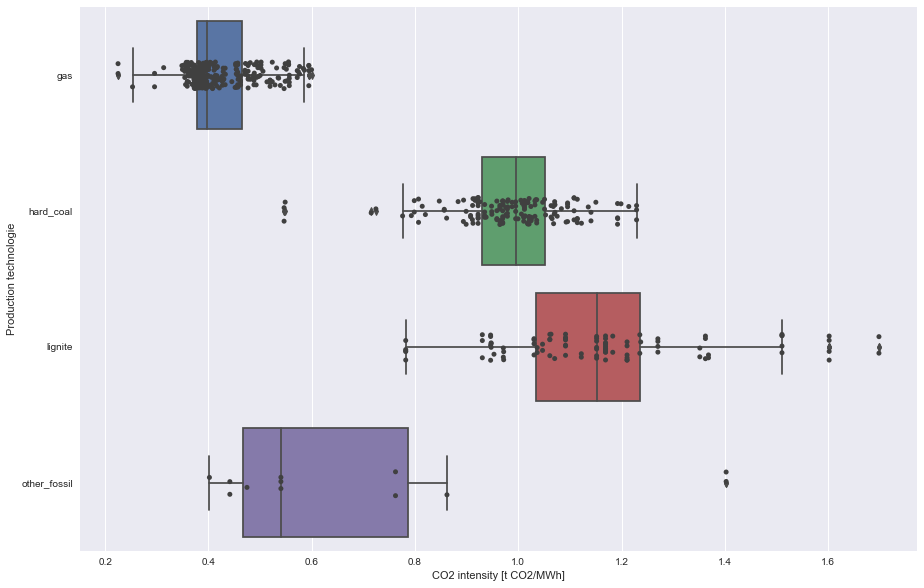

In [29]:
fig, ax = plt.subplots(1, 1)

ax = sns.boxplot(y="ProductionTypeName", x="PP_EF", data=generation_unit_info_validated, orient="h")

ax = sns.stripplot(x="PP_EF", y="ProductionTypeName", data=generation_unit_info_validated, color=".25", orient="h")

ax.set_xlabel("CO2 intensity [t CO2/MWh]")
ax.set_ylabel("Production technologie")

#### Save point

In [30]:
fig.savefig(os.path.join(processed_directory_path + '/_CO2_intensity_by_technology.png'))

In [31]:
generation_unit_info_validated.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per technology and country

In the following section we calculate EF per technology and country.

In [32]:
generation_per_tech_country = generation_unit_info_validated.groupby(['EUTL_countrycode','ProductionTypeName']).sum()[['generation_2018','PP_emissions']]

In [33]:
EF_per_tech_country = generation_per_tech_country.PP_emissions / generation_per_tech_country.generation_2018

#### Plot mean EF per technology and country

<Figure size 1080x720 with 0 Axes>

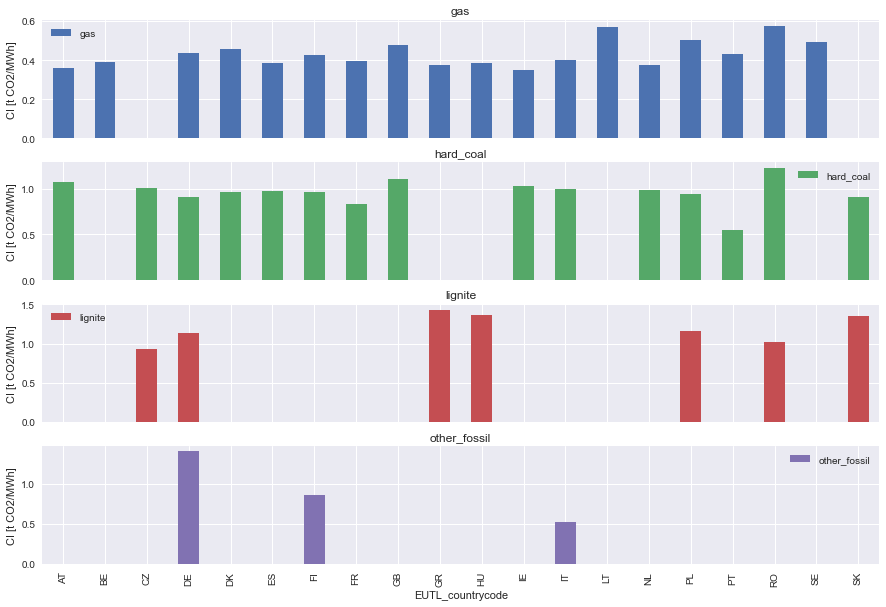

In [34]:
plt.figure()

EF_per_tech_country.unstack(level=1).plot(kind='bar', subplots=True, ylabel='CI [t CO2/MWh]')

plt.grid(True)

#### Emission factors per technologies and countries

In [35]:
EF_per_tech_country

EUTL_countrycode  ProductionTypeName
AT                gas                   0.360910
                  hard_coal             1.069627
BE                gas                   0.389955
CZ                hard_coal             1.010505
                  lignite               0.932336
DE                gas                   0.434490
                  hard_coal             0.909259
                  lignite               1.135463
                  other_fossil          1.402450
DK                gas                   0.456925
                  hard_coal             0.959711
ES                gas                   0.386506
                  hard_coal             0.975777
FI                gas                   0.426210
                  hard_coal             0.960352
                  other_fossil          0.861855
FR                gas                   0.396383
                  hard_coal             0.834945
GB                gas                   0.478437
                  hard_coal     

#### Add technology specific EF to the data set

In [36]:
# reset index
generation_unit_info_validated.reset_index(inplace=True)
# set new index for maping function 
generation_unit_info_EF_tech = generation_unit_info_validated.set_index(['EUTL_countrycode','ProductionTypeName'])

# map the EF to the data set
generation_unit_info_EF_tech['Tech_EF'] = generation_unit_info_EF_tech.index.map(EF_per_tech_country.to_dict())

#reset index
generation_unit_info_EF_tech.reset_index(inplace=True)

#set old index
generation_unit_info_EF_tech.set_index(['eic_g'],inplace=True)

In [37]:
generation_unit_info_EF_tech.head(5)

,EUTL_countrycode,ProductionTypeName,index,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,MapCode,PowerSystemResourceName,duplicate_count,...,ALLOCATION_2009,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation,PP_emissions,PP_EF,CI_validation,Tech_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,gas,1,10YAT-APG------L,APG CA,CTA,400.0,AT,Kraftwerk Timelkam GUD,2.0,...,681283,340026,218704,103553,OPEN,685235.67,2.672040e+05,0.389945,True,0.360910
45W000000000032T,DK,hard_coal,6,10Y1001A1001A796,Energinet CA,CTA,147.0,DK,Asnaesvaerket 2,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,2.501768e+05,1.140746,True,0.959711
45W000000000033R,DK,hard_coal,7,10Y1001A1001A796,Energinet CA,CTA,640.0,DK,Asnaesvaerket 5,1.0,...,1765314,2430356,1765318,2484733,OPEN,770018.30,6.282182e+05,1.140746,True,0.959711
45W000000000034P,DK,hard_coal,8,10Y1001A1001A796,Energinet CA,CTA,250.0,DK,Amagervaerket 3,1.0,...,1250992,1684995,1250995,1089604,OPEN,1060165.23,1.038454e+06,0.979521,True,0.959711
45W000000000040U,DK,hard_coal,9,10Y1001A1001A796,Energinet CA,CTA,377.0,DK,Esbjergvaerket 3,1.0,...,1051487,1318927,1051489,1158930,OPEN,1193633.83,1.066679e+06,0.893640,True,0.959711


#### Save point

In [38]:
generation_unit_info_EF_tech.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

## Emission factor per country

In the following section we calculate mean EF per country.

In [39]:
generation_per_country = generation_unit_info_validated.groupby(['EUTL_countrycode']).sum()[['generation_2018','PP_emissions']]

In [40]:
EF_per_country = generation_per_country.PP_emissions / generation_per_country.generation_2018

In [41]:
# reset index
generation_unit_info_EF_tech.reset_index(inplace=True)
# set new index for maping function 
generation_unit_info_EF_country = generation_unit_info_EF_tech.set_index(['MapCode'])

# map the EF to the data set
generation_unit_info_EF_country['Country_EF'] = generation_unit_info_EF_country.index.map(EF_per_country.to_dict())

#reset index
generation_unit_info_EF_country.reset_index(inplace=True)

#set old index
generation_unit_info_EF_country.set_index(['eic_g'],inplace=True)

In [42]:
generation_unit_info_EF_country.head(5)

,MapCode,EUTL_countrycode,ProductionTypeName,index,AreaCode,AreaName,AreaTypeCode,InstalledGenCapacity,PowerSystemResourceName,duplicate_count,...,VERIFIED_EMISSIONS_2009,ALLOCATION_2008,VERIFIED_EMISSIONS_2008,ACCOUNT_CLOSURE,side_generation,PP_emissions,PP_EF,CI_validation,Tech_EF,Country_EF
eic_g,,,,,,,,,,,,,,,,,,,,,
14WENERGIEAGWT4S,AT,AT,gas,1,10YAT-APG------L,APG CA,CTA,400.0,Kraftwerk Timelkam GUD,2.0,...,340026,218704,103553,OPEN,685235.67,2.672040e+05,0.389945,True,0.360910,0.427776
45W000000000032T,DK,DK,hard_coal,6,10Y1001A1001A796,Energinet CA,CTA,147.0,Asnaesvaerket 2,1.0,...,2430356,1765318,2484733,OPEN,770018.30,2.501768e+05,1.140746,True,0.959711,0.934412
45W000000000033R,DK,DK,hard_coal,7,10Y1001A1001A796,Energinet CA,CTA,640.0,Asnaesvaerket 5,1.0,...,2430356,1765318,2484733,OPEN,770018.30,6.282182e+05,1.140746,True,0.959711,0.934412
45W000000000034P,DK,DK,hard_coal,8,10Y1001A1001A796,Energinet CA,CTA,250.0,Amagervaerket 3,1.0,...,1684995,1250995,1089604,OPEN,1060165.23,1.038454e+06,0.979521,True,0.959711,0.934412
45W000000000040U,DK,DK,hard_coal,9,10Y1001A1001A796,Energinet CA,CTA,377.0,Esbjergvaerket 3,1.0,...,1318927,1051489,1158930,OPEN,1193633.83,1.066679e+06,0.893640,True,0.959711,0.934412


#### Plot

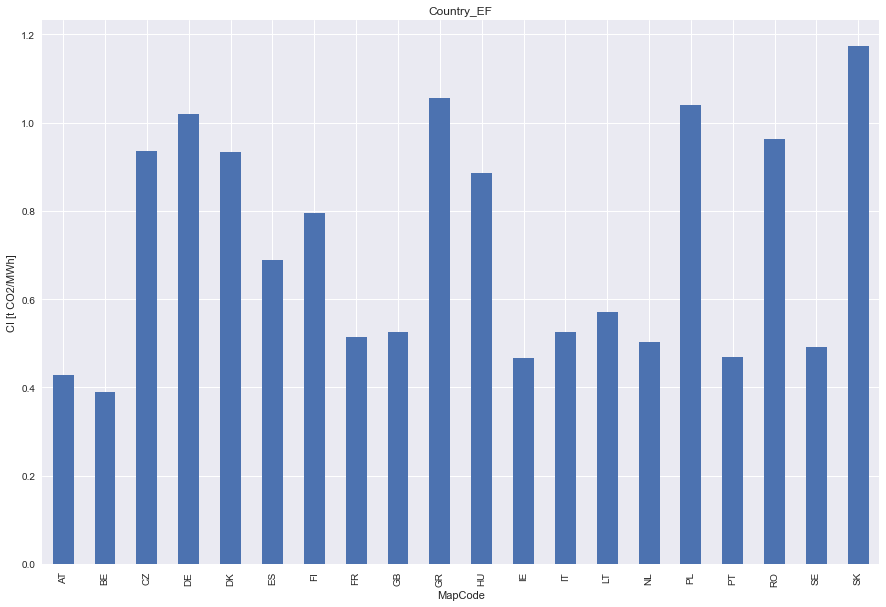

In [43]:
plt.figure()

generation_unit_info_EF_country.groupby(['MapCode']).mean().Country_EF.plot(kind='bar', subplots=True, ylabel='CI [t CO2/MWh]')

plt.grid(True)

#### Save point

In [44]:
generation_unit_info_EF_country.to_csv(processed_directory_path + '/generation_unit_EF_bottom_up_methode.csv')

# Validation of calculated emission factors

In this section we checking if the underlying power production that we have used for EF calculation represent the country production. By comparing the used power plant production with the production per production type (from ENTSO-E) of each country, we can get an idea how trustful is our resulting EF.

#### Load ENTSO-E generation per type

In [45]:
entsoe_gen_type = load_timeseries_ENTSOE(input_directory_path, 'time_series_60min_multiindex.csv')

Show the head of the data (the data is using a multi index for the columns)

In [46]:
entsoe_gen_type.head()

region                                                                                                     AT  \
variable                                                                                              biomass   
attribute                                                                                   generation_actual   
source                                                          own calculation based on ENTSO-E Transparency   
web                       https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show   
unit                                                                                                       MW   
utc_timestamp                                                                                                   
2018-01-01 00:00:00+00:00                                              316.0                                    
2018-01-01 01:00:00+00:00                                              316.0                                    
2018-01-01 02:00:00+00:00                                              316.0                                    
2018-01-01 03:00:00+00:00                                              316.0                                    
2018-01-01 04:00:00+00:00                                              316.0                                    

region                                                                                                         \
variable                                                                                                  gas   
attribute                                                                                   generation_actual   
source                                                          own calculation based on ENTSO-E Transparency   
web                       https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show   
unit                                                                                                       MW   
utc_timestamp                                                                                                   
2018-01-01 00:00:00+00:00                                               71.0                                    
2018-01-01 01:00:00+00:00                                               70.0                                    
2018-01-01 02:00:00+00:00                                               69.0                                    
2018-01-01 03:00:00+00:00                                               72.0                                    
2018-01-01 04:00:00+00:00                                               75.0                                    

region                                                                                                         \
variable                                                                                           geothermal   
attribute                                                                                   generation_actual   
source                                                          own calculation based on ENTSO-E Transparency   
web                       https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show   
unit                                                                                                       MW   
utc_timestamp                                                                                                   
2018-01-01 00:00:00+00:00                                                0.0                                    
2018-01-01 01:00:00+00:00                                                0.0                                    
2018-01-01 02:00:00+00:00                                                0.0                                    
2018-01-01 03:00:00+00:00                                                0.0                                    
2018-01-01 04:00:00+00:00                  

#### Filter the data
- countries
- technologies

that are covert from our method

In [47]:
#country filter
entsoe_gen_type_pp = entsoe_gen_type[generation_unit_info_validated.EUTL_countrycode.unique()]
# take the sum of the generation
entsoe_gen_type_pp = entsoe_gen_type_pp.sum()

Reset the multiindex from pandas and drop not used columns

In [48]:
entsoe_gen_type_pp = entsoe_gen_type_pp.reset_index()
entsoe_gen_type_pp = entsoe_gen_type_pp.drop(columns=['attribute', 'source', 'web', 'unit'])

Rename columns

In [49]:
entsoe_gen_type_pp = entsoe_gen_type_pp.rename(columns={0:'generation_per_type_2018_ENTSO-E','region':'EUTL_countrycode','variable':'ProductionTypeName'})

#### Production for each technology form power plant generation

In [50]:
Powerplants_gen_type_year = pd.DataFrame(generation_unit_info_validated.groupby(['EUTL_countrycode','ProductionTypeName']).sum()['generation_2018'])

Reset the multiindex from pandas and drop not used columns

In [51]:
Powerplants_gen_type_year = Powerplants_gen_type_year.reset_index()
Powerplants_gen_type_year = Powerplants_gen_type_year.rename(columns={'generation_2018':'verified_generation_per_unit_2018_ENTSO-E'})

#### Merge power plant generation and ENTSO-E per type

In [52]:
gen_data_comparison = entsoe_gen_type_pp.merge(Powerplants_gen_type_year, on=['EUTL_countrycode','ProductionTypeName'])

In [53]:
gen_data_comparison['missing_generation'] = gen_data_comparison['generation_per_type_2018_ENTSO-E'] - gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E']

In [54]:
gen_data_comparison['covered_generation'] = round((100 / gen_data_comparison['generation_per_type_2018_ENTSO-E']) * gen_data_comparison['verified_generation_per_unit_2018_ENTSO-E'])

In [55]:
gen_data_comparison.head(10)

,EUTL_countrycode,ProductionTypeName,generation_per_type_2018_ENTSO-E,verified_generation_per_unit_2018_ENTSO-E,missing_generation,covered_generation
0,AT,gas,8.168009e+06,6.660371e+06,1.507638e+06,82.0
1,AT,hard_coal,1.422450e+06,6.938571e+05,7.285929e+05,49.0
2,DK,gas,2.843756e+06,2.734431e+05,2.570312e+06,10.0
3,DK,hard_coal,6.426351e+06,5.161056e+06,1.265296e+06,80.0
4,BE,gas,2.230368e+07,1.426578e+07,8.037897e+06,64.0
5,DE,gas,4.295907e+07,1.549585e+07,2.746322e+07,36.0
6,DE,hard_coal,7.154638e+07,6.087217e+07,1.067421e+07,85.0
7,DE,lignite,1.283613e+08,1.292305e+08,-8.691585e+05,101.0
8,DE,other_fossil,3.862005e+06,1.971580e+06,1.890425e+06,51.0
9,FI,gas,5.000652e+06,1.969562e+06,3.031090e+06,39.0


#### Plot covered generation per country and generation type

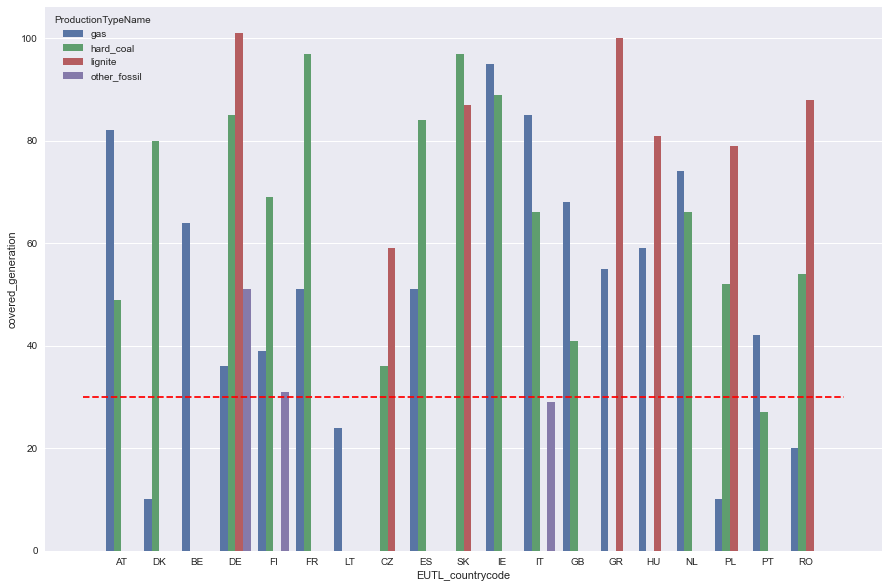

In [56]:
ax = sns.barplot(x="EUTL_countrycode", y="covered_generation", hue="ProductionTypeName", data=gen_data_comparison)
ax.plot([-1, 19], [30, 30], 'r--')

#### Mean coverage per country

In [57]:
gen_data_comparison.groupby(['EUTL_countrycode']).mean()['covered_generation']

EUTL_countrycode
AT    65.500000
BE    64.000000
CZ    47.500000
DE    68.250000
DK    45.000000
ES    67.500000
FI    46.333333
FR    74.000000
GB    54.500000
GR    77.500000
HU    70.000000
IE    92.000000
IT    60.000000
LT    24.000000
NL    70.000000
PL    47.000000
PT    34.500000
RO    54.000000
SK    92.000000
Name: covered_generation, dtype: float64

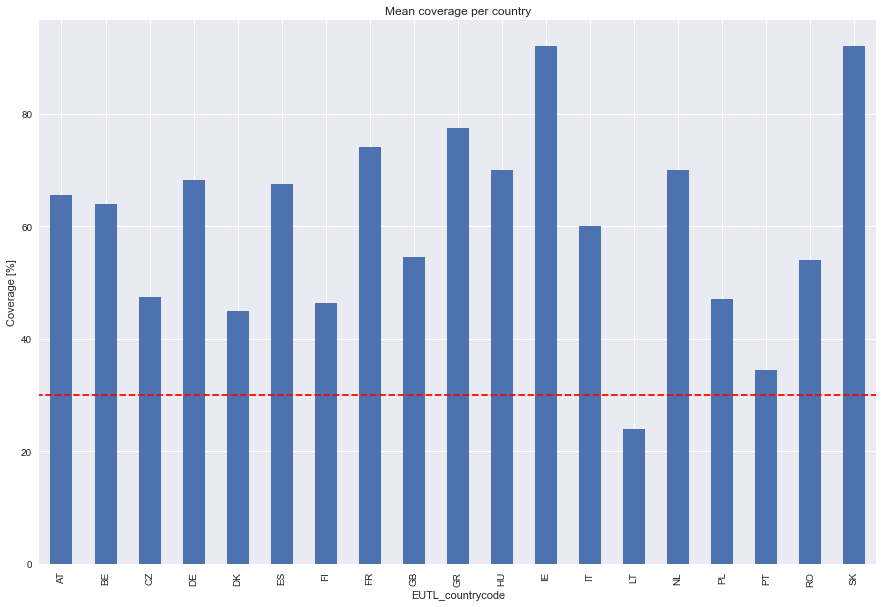

In [58]:
fig, ax = plt.subplots(1, 1)
ax = gen_data_comparison.groupby(['EUTL_countrycode']).mean()['covered_generation'].plot(kind='bar', title='Mean coverage per country', ylabel='Coverage [%]')
ax.plot([-10, 100], [30, 30], 'r--')

In [59]:
fig.savefig(os.path.join(output_directory_path + '/_mean_coverage_of_elec_production_per_country.png'))

Mean coverage over all countries

In [60]:
gen_data_comparison.covered_generation.mean()

61.023809523809526

## Validation threshold for EF per technology and country

Take only the countries and technologies where at least 30 % of the generation is connected to CO2 emissions.

In [61]:
# add identifier
gen_data_comparison['Verified_EF'] = (round(gen_data_comparison['covered_generation']) > 30)

In [62]:
# set new index
gen_data_comparison = gen_data_comparison.set_index(['EUTL_countrycode','ProductionTypeName'])

In [63]:
# take the calculated EF from 7.3 and reset the used index
EF_per_tech_country = EF_per_tech_country.reset_index().rename(columns={0:'EF','EUTL_countrycode':'MapCode'}).set_index(['MapCode','ProductionTypeName'])

In [64]:
# Transfer the verification of EF too the result
EF_per_tech_country['Verified_EF'] = gen_data_comparison['Verified_EF']

In [65]:
EF_per_tech_country

EF Verified_EF
MapCode ProductionTypeName                      
AT      gas                 0.360910        True
        hard_coal           1.069627        True
BE      gas                 0.389955        True
CZ      hard_coal           1.010505        True
        lignite             0.932336        True
DE      gas                 0.434490        True
        hard_coal           0.909259        True
        lignite             1.135463        True
        other_fossil        1.402450        True
DK      gas                 0.456925       False
        hard_coal           0.959711        True
ES      gas                 0.386506        True
        hard_coal           0.975777        True
FI      gas                 0.426210        True
        hard_coal           0.960352        True
        other_fossil        0.861855        True
FR      gas                 0.396383        True
        hard_coal           0.834945        True
GB      gas                 0.478437        True
        hard_coal           1.103223        True
GR      gas                 0.373103        True
        lignite             1.433019        True
HU      gas                 0.386797        True
        lignite             1.362365        True
IE      gas                 0.347416        True
        hard_coal           1.032204        True
IT      gas                 0.398540        True
        hard_coal           0.997673        True
        other_fossil        0.516962       False
LT      gas                 0.571921       False
NL      gas                 0.373476        True
        hard_coal           0.984564        True
PL      gas                 0.505579       False
        hard_coal           0.945580        True
        lignite             1.162487        True
PT      gas                 0.430328        True
        hard_coal           0.546439       False
RO      gas                 0.575246       False
        hard_coal           1.229018        True
        lignite             1.014415        True
SE      gas                 0.492360         NaN
SK      hard_coal           0.907594        True
        lignite             1.351470        True

# Export final EF to csv

In [66]:
EF_per_tech_country.to_csv(processed_directory_path + '/EF_bottom_up_methode.csv')
EF_per_tech_country.to_csv(output_directory_path + '/EF_bottom_up_methode.csv')